In [1]:
#Importing Main Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import numpy as np

In [2]:
#Importing The Dataset Downloaded From Kaggle
data = pd.read_csv("/home/kanax/Desktop/ML_Projects/covid_data.csv",encoding='ISO-8859-1')
data.head()

,Date,Headline,Covid,Image,Source,Unnamed: 5
0,2020-04-29,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,https://static.inshorts.com/inshorts/images/v1...,http://www.rajswasthya.nic.in/?utm_campaign=fu...,NaN
1,2020-04-29,"Coronavirus cases in Delhi surge to 3,439 afte...",1,https://static.inshorts.com/inshorts/images/v1...,https://twitter.com/shemin_joy/status/12555489...,NaN
2,2020-04-30,"Anguished, I'll always recall our interactions...",0,https://static.inshorts.com/inshorts/images/v1...,https://twitter.com/narendramodi/status/125573...,NaN
3,2020-04-30,It's a terrible week for Indian cinema: Rahul ...,0,https://static.inshorts.com/inshorts/images/v1...,https://zeenews.india.com/india/politicians-mo...,NaN
4,2020-04-30,Delhi Police perform 'parikrama' of AIIMS to t...,1,https://static.inshorts.com/inshorts/images/v1...,https://zeenews.india.com/india/delhi-police-p...,NaN


In [3]:
#Dropping Irrelevant Columns
data.drop(['Date','Image','Source','Unnamed: 5'],axis=1,inplace=True)
data.columns = ['Headline','Class']

In [4]:
data.shape

(4072, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  4072 non-null   object
 1   Class     4072 non-null   object
dtypes: object(2)
memory usage: 63.8+ KB


In [6]:
data.Class.value_counts()

1                                     3131
0                                      796
 death toll at 18                        2
 pics surface                            2
 arrested                                2
                                      ... 
 dispersed                               1
 death toll at 10                        1
 mask made mandatory in workplaces       1
 doctors manhandled                      1
 at least 71 tested positive             1
Name: Class, Length: 143, dtype: int64

In [7]:
#The Above Cell Shows Us That Entries In Class Column Are Non-Numeric
data.drop(data.index[data['Class'].apply(lambda x: not (x.strip().isnumeric()))], axis=0, inplace=True)
data.Class.value_counts()

1    3131
0     796
Name: Class, dtype: int64

In [8]:
#Encoding The Entries In The Class
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Class'] = encoder.fit_transform(data['Class'])
data.head()

,Headline,Class
0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1
1,"Coronavirus cases in Delhi surge to 3,439 afte...",1
2,"Anguished, I'll always recall our interactions...",0
3,It's a terrible week for Indian cinema: Rahul ...,0
4,Delhi Police perform 'parikrama' of AIIMS to t...,1


In [9]:
#Checking For Null-Values
data.isnull().sum()

Headline    0
Class       0
dtype: int64

In [10]:
#Checking For Duplicates
data.duplicated().sum()

0

[Text(0, 0.5, 'Count')]

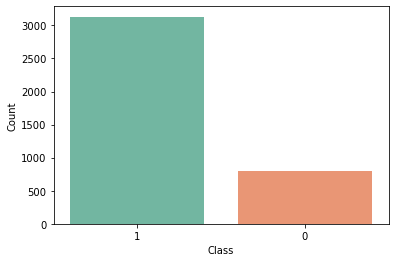

In [11]:
#Checking For Imbalance In Class Values
p = sns.countplot(data=data, x='Class', order=data.Class.value_counts().index,palette="Set2")
p.set(ylabel = "Count")

In [12]:
#Adding Columns For Word-Count & Data-Count
data['character_count'] = data['Headline'].apply(len)
data['word_count'] = data['Headline'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Headline,Class,character_count,word_count
0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,64,10
1,"Coronavirus cases in Delhi surge to 3,439 afte...",1,76,13
2,"Anguished, I'll always recall our interactions...",0,79,16
3,It's a terrible week for Indian cinema: Rahul ...,0,77,16
4,Delhi Police perform 'parikrama' of AIIMS to t...,1,64,11


In [13]:
#Running .describe() On Both The Classes

class1 = data[data['Class']==0][['character_count','word_count']].describe()
class2 = data[data['Class']==1][['character_count','word_count']].describe()

dfs = [class1, class2]

description = pd.concat(
    [df.rename(columns=lambda x: x.zfill(4)) for df in dfs],
    keys=['Not Related To COVID-19','Related To COVID-19'],
    axis=1
)

description

Not Related To COVID-19             Related To COVID-19             
              character_count  word_count     character_count   word_count
count              796.000000  796.000000         3131.000000  3131.000000
mean                71.248744   12.968593           71.307569    12.556372
std                  7.552812    2.269906            8.061402     2.269171
min                 41.000000    6.000000           37.000000     5.000000
25%                 67.000000   11.000000           66.000000    11.000000
50%                 72.000000   13.000000           72.000000    12.000000
75%                 77.000000   14.000000           78.000000    14.000000
max                 88.000000   20.000000           88.000000    22.000000

<AxesSubplot:xlabel='word_count', ylabel='Count'>

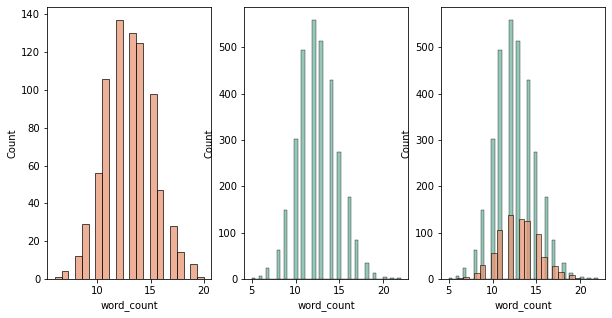

In [14]:
#Visualizing The Results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(data[data['Class']==0]['word_count'],color='#E99675')
plt.subplot(1,3,2)
sns.histplot(data[data['Class']==1]['word_count'],color='#72B6A1')
plt.subplot(1,3,3)
sns.histplot(data[data['Class']==1]['word_count'],color='#72B6A1')
sns.histplot(data[data['Class']==0]['word_count'],color='#E99675')

In [15]:
#Counting Outliers
len(data[data['word_count'] < 3])+len(data[data['word_count'] > 20])

5

In [16]:
#Dropping The Outliers
data.drop(data[data['word_count'] < 3].index, inplace = True)
data.drop(data[data['word_count'] > 20].index, inplace = True)
data = data.reset_index(drop=True)

In [17]:
#Running .describe() On Both The Classes Again

class1 = data[data['Class']==0][['character_count','word_count']].describe()
class2 = data[data['Class']==1][['character_count','word_count']].describe()

dfs = [class1, class2]

description = pd.concat(
    [df.rename(columns=lambda x: x.zfill(4)) for df in dfs],
    keys=['Not Related To COVID-19','Related To COVID-19'],
    axis=1
)

description

Not Related To COVID-19             Related To COVID-19             
              character_count  word_count     character_count   word_count
count              796.000000  796.000000         3126.000000  3126.000000
mean                71.248744   12.968593           71.294306    12.542226
std                  7.552812    2.269906            8.058332     2.243135
min                 41.000000    6.000000           37.000000     5.000000
25%                 67.000000   11.000000           66.000000    11.000000
50%                 72.000000   13.000000           72.000000    12.000000
75%                 77.000000   14.000000           78.000000    14.000000
max                 88.000000   20.000000           88.000000    20.000000

<AxesSubplot:xlabel='word_count', ylabel='Count'>

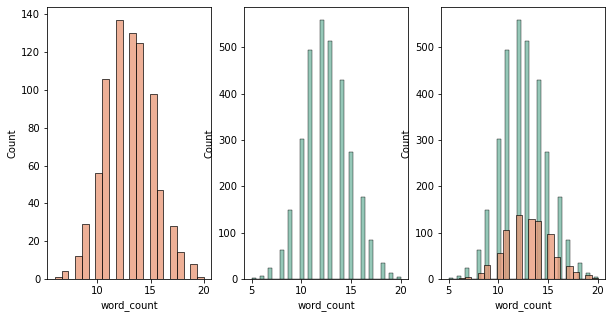

In [18]:
#Re-plotting The Histograms
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(data[data['Class']==0]['word_count'],color='#E99675')
plt.subplot(1,3,2)
sns.histplot(data[data['Class']==1]['word_count'],color='#72B6A1')
plt.subplot(1,3,3)
sns.histplot(data[data['Class']==1]['word_count'],color='#72B6A1')
sns.histplot(data[data['Class']==0]['word_count'],color='#E99675')

In [19]:
#Cleaning Our Dataset
from nltk.corpus import stopwords

sw_nltk = stopwords.words('english')
def cleaned(review):
    review = ' '.join(review.split())
    review = review.lower()
    review = re.sub('[^A-Za-z0-9]+', ' ', review)
    review = ''.join([i for i in review if not i.isdigit()])
    review = ' '.join(review.split())
    review = ' '.join( [i for i in review.split() if len(i)>1] )
    review = ' '.join(review.split())
    review = [i for i in review.split() if i not in sw_nltk]
    review = " ".join(review)
    return(review)

In [20]:
#An Example
from random import sample

string = sample(data['Headline'].tolist(),1)[0]
" '{0}' becomes '{1}' ".format(string, cleaned(string))

" 'If CAA benefits minorities, why exclude Muslims?: Chidambaram to Amit Shah' becomes 'caa benefits minorities exclude muslims chidambaram amit shah' "

In [21]:
#Applying The Clean Function On Our Headline Column
data['Headline'] = data['Headline'].apply(cleaned)

Text(0.5, 1.0, 'Not Related To COVID-19')

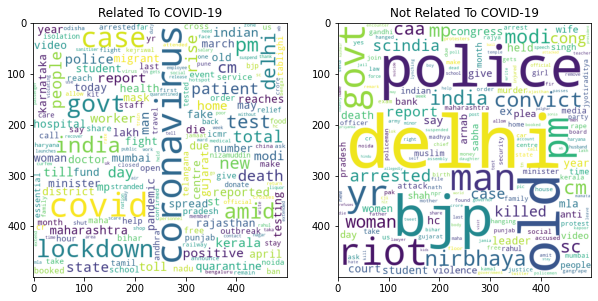

In [22]:
#Plotting Word-Clouds For Both Our Classes
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,background_color='white',collocations=False)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
positive_cloud = wc.generate(data[data['Class']==1]['Headline'].str.cat(sep=' '))
plt.imshow(positive_cloud)
plt.title("Related To COVID-19")
plt.subplot(1,2,2)
negative_cloud = wc.generate(data[data['Class']==0]['Headline'].str.cat(sep=' '))
plt.imshow(negative_cloud)
plt.title("Not Related To COVID-19")

In [23]:
#Feature Extraction Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=4000)
#X = tfidf.fit_transform(data['Headline']).toarray()
X = tfidf.fit_transform(list(data['Headline']))
y = data['Class'].values

In [24]:
X.shape

(3922, 4000)

In [25]:
#Picking Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

lrc = LogisticRegression()
knc = KNeighborsClassifier()
nbc = MultinomialNB()
svc = SVC()
classifiers = {
    'Logistic Regression': lrc, 
    'K-Nearest Neighbours': knc, 
    'Multinomial Naive Bayes': nbc,
    'Support Vector Machine': svc
}

In [26]:
#Splitting Our Dataset With The (stratify=) Parameter Set To True
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,shuffle=True, test_size=0.33)

In [27]:
#Ratio Of Train:Test Target Values With Class 0
np.unique(y_train, return_counts=True)[1][0]/np.unique(y_test, return_counts=True)[1][0]

2.026615969581749

In [28]:
#Ratio Of Train:Test Target Values With Class 1
np.unique(y_train, return_counts=True)[1][1]/np.unique(y_test, return_counts=True)[1][1]

2.0290697674418605

In [29]:
#Evaluating The Performance Of Our Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, f1_score

def classifier_metrics(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    return(accuracy, precision, recall, f1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, classifier in classifiers.items():
    accuracy, precision, recall, f1 = classifier_metrics(classifier,X_train,y_train,X_test,y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision) 
    recall_scores.append(recall)
    f1_scores.append(f1)

performance = pd.DataFrame({'Algorithm':classifiers.keys(),
                            'Accuracy':accuracy_scores,
                            'Precision':precision_scores,
                            'Recall':recall_scores,
                            'F1':f1_scores}
                          )
performance.sort_values(['Accuracy'],ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1
3,Support Vector Machine,0.894208,0.888118,0.992248,0.937300
0,Logistic Regression,0.878764,0.870449,0.996124,0.929056
1,K-Nearest Neighbours,0.875676,0.879025,0.978682,0.926181
2,Multinomial Naive Bayes,0.862548,0.854063,0.998062,0.920465


In [30]:
#SVMs, k-NNs & LRCs Are Distance Based Algorithms. We Normalize X
from sklearn.preprocessing import MaxAbsScaler

norm = MaxAbsScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [31]:
#Evaluating The Performance Of Our Models After Normalizing X
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, classifier in classifiers.items():
    accuracy, precision, recall, f1 = classifier_metrics(classifier,X_train,y_train,X_test,y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision) 
    recall_scores.append(recall)
    f1_scores.append(f1)

performance_normalized = pd.DataFrame({'Algorithm':classifiers.keys(),
                            'Accuracy':accuracy_scores,
                            'Precision':precision_scores,
                            'Recall':recall_scores,
                            'F1':f1_scores}
                          )
performance_normalized.sort_values(['Accuracy'],ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1
2,Multinomial Naive Bayes,0.921236,0.938679,0.964147,0.951243
0,Logistic Regression,0.914286,0.928372,0.967054,0.947318
3,Support Vector Machine,0.901931,0.900088,0.986434,0.941285
1,K-Nearest Neighbours,0.869498,0.867860,0.986434,0.923356


In [32]:
#Checking If There's Any Room For Tradeoff Between Recall & Precision
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

nbc_tuned = MultinomialNB()

fit_prior = [True,False]
alpha = [1, 0.1, 0.01, 0.001, 0.000001]

grid = dict(fit_prior=fit_prior,alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=nbc_tuned, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.947118 using {'alpha': 1, 'fit_prior': True}


In [33]:
metrics = classifier_metrics(MultinomialNB(alpha=1,fit_prior=True),X_train,y_train,X_test,y_test)

In [34]:
" Accuracy: {0}, Precision: {1}, Recall: {2}, F1: {3}".format(metrics[0],metrics[1],metrics[2],metrics[3])

' Accuracy: 0.9212355212355212, Precision: 0.9386792452830188, Recall: 0.9641472868217055, F1: 0.9512428298279157'

In [35]:
#Defining A Corpus & A Vocabulary
corpus = data['Headline']
corpus = corpus.tolist()
vocab = []
for i in range(len(corpus)):
    vocab.extend(corpus[i].split())
vocab = list(set(vocab))

In [36]:
#Fitting The Model
model = MultinomialNB(alpha=0.1,fit_prior=False)
model.fit(X_train,y_train)

MultinomialNB(alpha=0.1, fit_prior=False)

In [37]:
#Defining A Function For Our Gradio Applet
def sentiment(review):
    review = cleaned(review)
    review = review.split()
    for word in review:
        if word not in vocab:
            review.remove(word)
    review = ' '.join(review)
    vector = norm.transform(tfidf.transform([review]))
    pred = model.predict(vector)
    if pred[0] == 0:
        return('Not Related to COVID-19')
    else:
        return('Related to COVID-19')

In [44]:
import gradio as gr
ex = ["GST collections at a record high of Rs. 1.42 lakh crore in March","Slow March of COVID: 4 deaths in Delhi"]
interface = gr.Interface(fn = sentiment, 
                         inputs = gr.inputs.Textbox(lines=2), 
                         outputs = 'text',
                         title='Headline Classifier',
                         examples=ex
                        )
interface.launch()

Running on local URL:  http://127.0.0.1:7866/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f1d8c338fd0>,
 'http://127.0.0.1:7866/',
 None)